In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

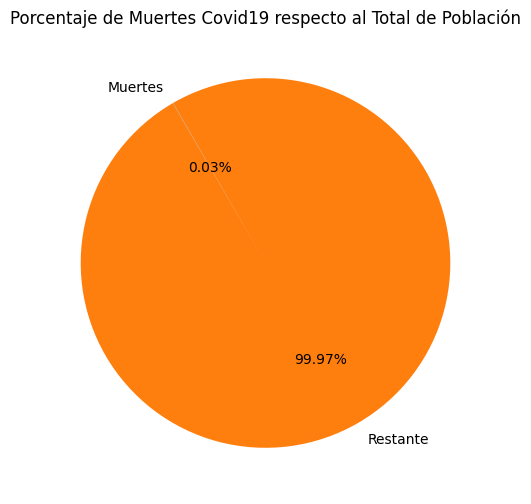

In [3]:
# Datos proporcionados
total_poblacion = 24363483115849.0
total_muertes = 8387297159.0

# Calcular el porcentaje de muertes respecto al total
porcentaje_muertes = (total_muertes / total_poblacion) * 100
porcentaje_restante = 100 - porcentaje_muertes

# Crear datos para el gráfico
labels = ['Muertes', 'Restante']
sizes = [porcentaje_muertes, porcentaje_restante]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=120)
plt.title('Porcentaje de Muertes Covid19 respecto al Total de Población')
plt.show()

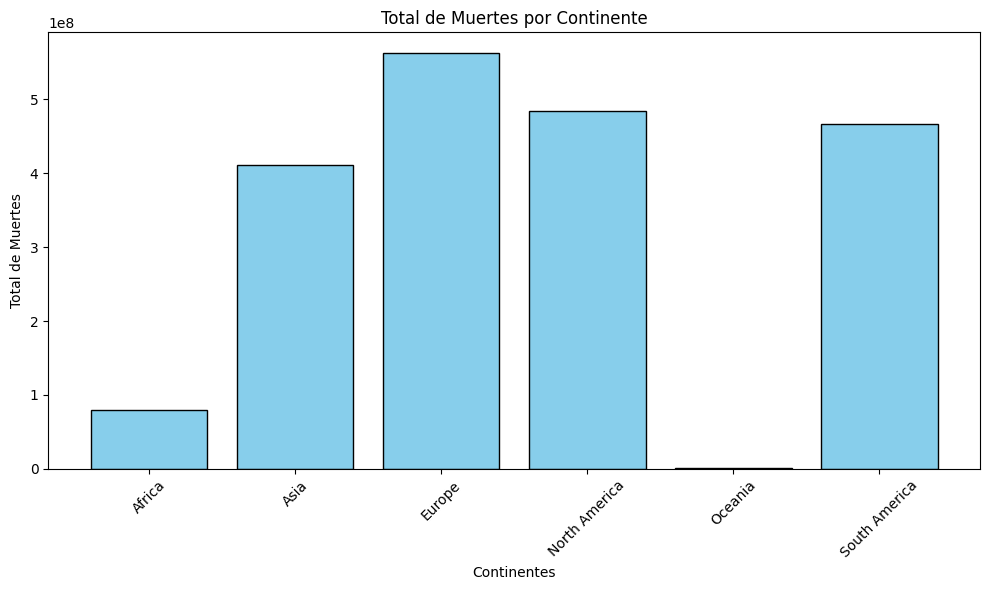

In [4]:
# Datos del DataFrame
continents = [
    "Africa", "Asia", "Europe", "North America", "Oceania", "South America"
]
total_deaths = [
    79384040.0, 411399666.0, 562760242.0, 484924819.0, 1288957.0, 467072609.0
]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(continents, total_deaths, color='skyblue', edgecolor='black')
plt.xlabel('Continentes')
plt.ylabel('Total de Muertes')
plt.title('Total de Muertes por Continente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

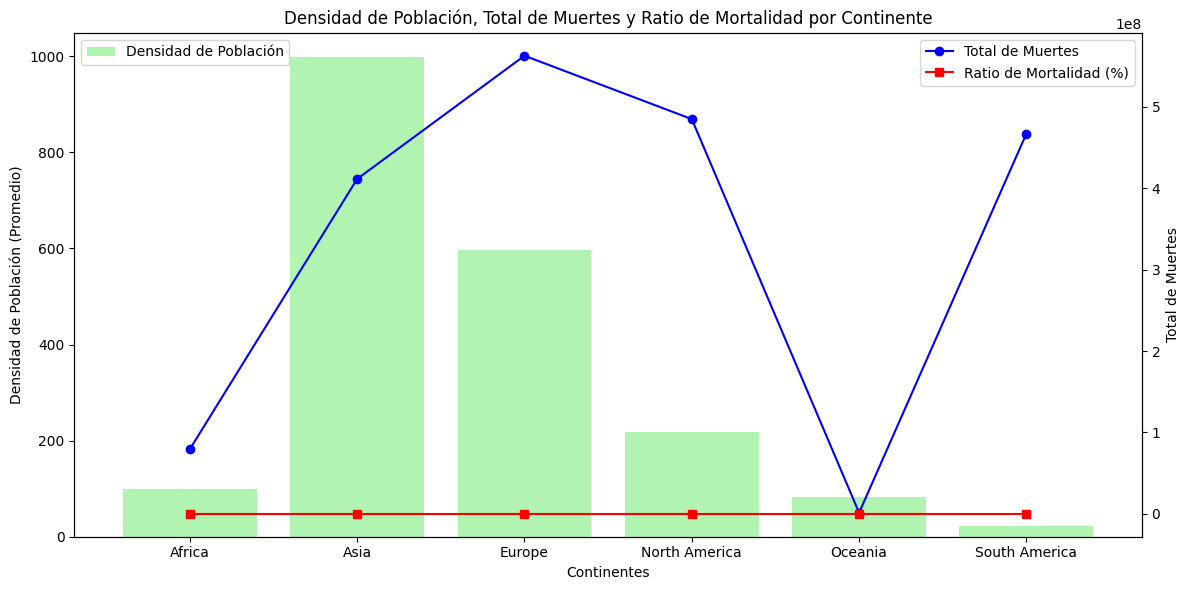

In [8]:
# Crear un gráfico combinado para reflejar densidad de población, total de muertes y ratio de mortalidad por continente

# Datos del DataFrame
population_density = [
    99.596138, 998.680907, 597.475498, 217.902954, 82.166671, 22.594076
]
mortality_rate = [
    0.007941, 0.011634, 0.099130, 0.106025, 0.004023, 0.145204
]

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para densidad de población
ax1.bar(continents, population_density, color='lightgreen', label='Densidad de Población', alpha=0.7)
ax1.set_ylabel('Densidad de Población (Promedio)')
ax1.set_xlabel('Continentes')
ax1.legend(loc='upper left')
ax1.set_title('Densidad de Población, Total de Muertes y Ratio de Mortalidad por Continente')

# Gráfico de líneas para el total de muertes
ax2 = ax1.twinx()
ax2.plot(continents, total_deaths, marker='o', color='blue', label='Total de Muertes')
ax2.set_ylabel('Total de Muertes')
ax2.legend(loc='upper right')

# Gráfico de líneas para el ratio de mortalidad
ax2.plot(continents, mortality_rate, marker='s', color='red', label='Ratio de Mortalidad (%)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


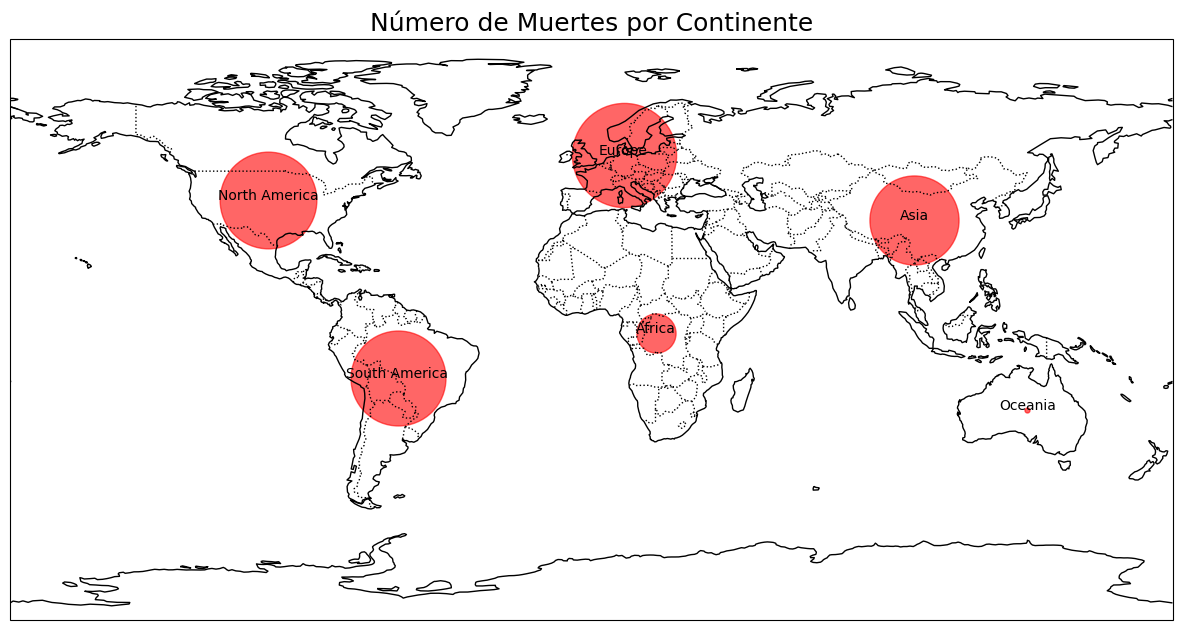

In [23]:
# Datos para el mapa
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
total_deaths = [79384040.0, 411399666.0, 562760242.0, 484924819.0, 1288957.0, 467072609.0]
lats = [-1.0, 34.0, 54.0, 40.0, -25.0, -15.0]  # Latitudes aproximadas
lons = [20.0, 100.0, 10.0, -100.0, 135.0, -60.0]  # Longitudes aproximadas

# Crear el mapa
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

# Agregar las burbujas al mapa
for lon, lat, deaths, continent in zip(lons, lats, total_deaths, continents):
    ax.scatter(lon, lat, s=deaths / 1e5, alpha=0.6, color='red', transform=ccrs.PlateCarree(), label=continent)
    ax.text(lon, lat, continent, transform=ccrs.PlateCarree(), fontsize=10, ha="center")

# Título
plt.title("Número de Muertes por Continente", fontsize=18)
plt.show()

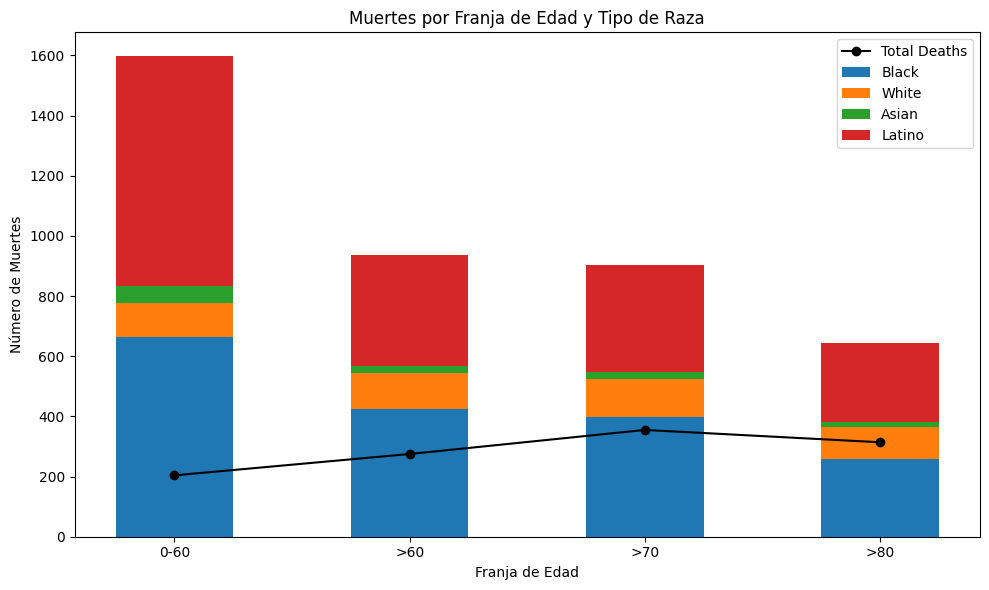

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame
data = {
    "Age": ["0-60", ">60", ">70", ">80"],
    "Deaths": [204, 275, 355, 314],
    "Black": [664, 423, 398, 258],
    "White": [113, 120, 127, 106],
    "Asian": [57, 23, 24, 17],
    "Latino": [763, 371, 356, 263]
}

df = pd.DataFrame(data)

# Configuración de categorías y valores
age_groups = df["Age"]
death_totals = df["Deaths"]
races = ["Black", "White", "Asian", "Latino"]
race_values = df[races].values.T

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
x_positions = np.arange(len(age_groups))

# Apilar cada grupo racial
bottom = np.zeros(len(age_groups))
for i, race in enumerate(races):
    ax.bar(x_positions, race_values[i], bar_width, label=race, bottom=bottom)
    bottom += race_values[i]

# Agregar línea para el total de muertes
ax.plot(x_positions, death_totals, color="black", marker="o", label="Total Deaths")

# Configurar el gráfico
ax.set_xlabel("Franja de Edad")
ax.set_ylabel("Número de Muertes")
ax.set_title("Muertes por Franja de Edad y Tipo de Raza")
ax.set_xticks(x_positions)
ax.set_xticklabels(age_groups)
ax.legend(loc="upper right")

# Mostrar gráfico
plt.tight_layout()
plt.show()


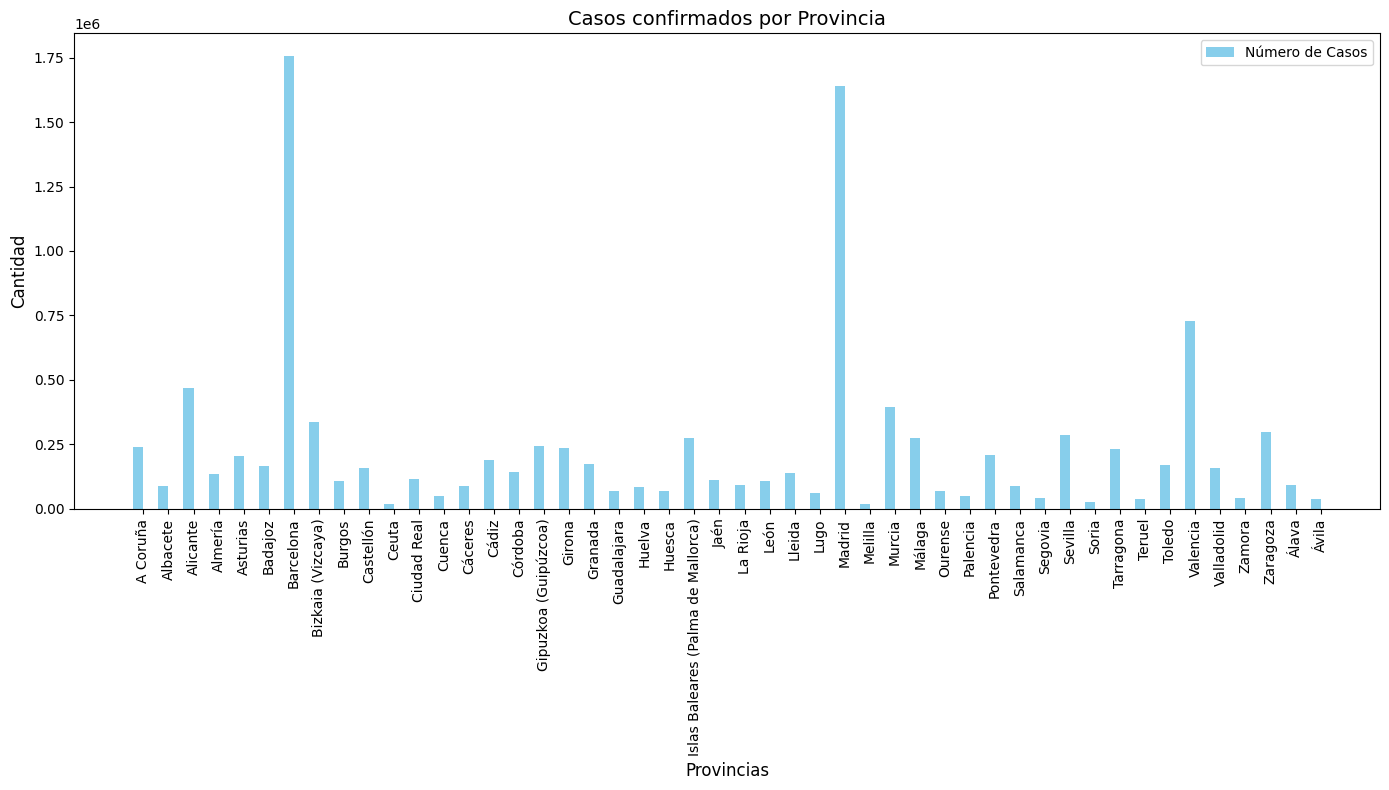

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame con los datos proporcionados
data = {
    "provincia_nombre": ["A Coruña", "Albacete", "Alicante", "Almería", "Asturias", "Badajoz", 
                         "Barcelona", "Bizkaia (Vizcaya)", "Burgos", "Castellón", "Ceuta", "Ciudad Real",
                         "Cuenca", "Cáceres", "Cádiz", "Córdoba", "Gipuzkoa (Guipúzcoa)", "Girona", 
                         "Granada", "Guadalajara", "Huelva", "Huesca", "Islas Baleares (Palma de Mallorca)", 
                         "Jaén", "La Rioja", "León", "Lleida", "Lugo", "Madrid", "Melilla", "Murcia", 
                         "Málaga", "Ourense", "Palencia", "Pontevedra", "Salamanca", "Segovia", "Sevilla",
                         "Soria", "Tarragona", "Teruel", "Toledo", "Valencia", "Valladolid", "Zamora",
                         "Zaragoza", "Álava", "Ávila"],
    "num_casos": [240813, 88516, 467588, 136435, 206423, 164377, 1756207, 335126, 106301, 160336, 19743, 115691,
                  51224, 87151, 190469, 144024, 242603, 235528, 172871, 68060, 83544, 69494, 275395, 113255,
                  93665, 108920, 140397, 61822, 1640978, 20679, 395267, 273033, 68994, 50708, 210708, 88015,
                  42144, 286152, 24779, 231218, 39948, 171391, 728119, 159874, 40906, 296093, 94120, 39808],
    "num_def": [1378, 982, 3464, 1149, 2603, 1188, 14601, 3084, 1090, 1053, 146, 1880, 700, 1071, 1764, 1320,
                2082, 1858, 2077, 751, 485, 748, 1377, 1318, 912, 1111, 908, 328, 19351, 154, 2216, 2364, 545,
                665, 947, 1189, 662, 2884, 489, 1500, 547, 2773, 4610, 1883, 660, 3375, 901, 574]
}

df = pd.DataFrame(data)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Crear las barras agrupadas
bar_width = 0.4
x = range(len(df["provincia_nombre"]))
ax.bar(x, df["num_casos"], width=bar_width, label="Número de Casos", color="skyblue")

# Configuración de ejes y etiquetas
ax.set_xlabel("Provincias", fontsize=12)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_title("Casos confirmados por Provincia", fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(df["provincia_nombre"], rotation=90, ha="center")
ax.legend()

# Ajustar márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()


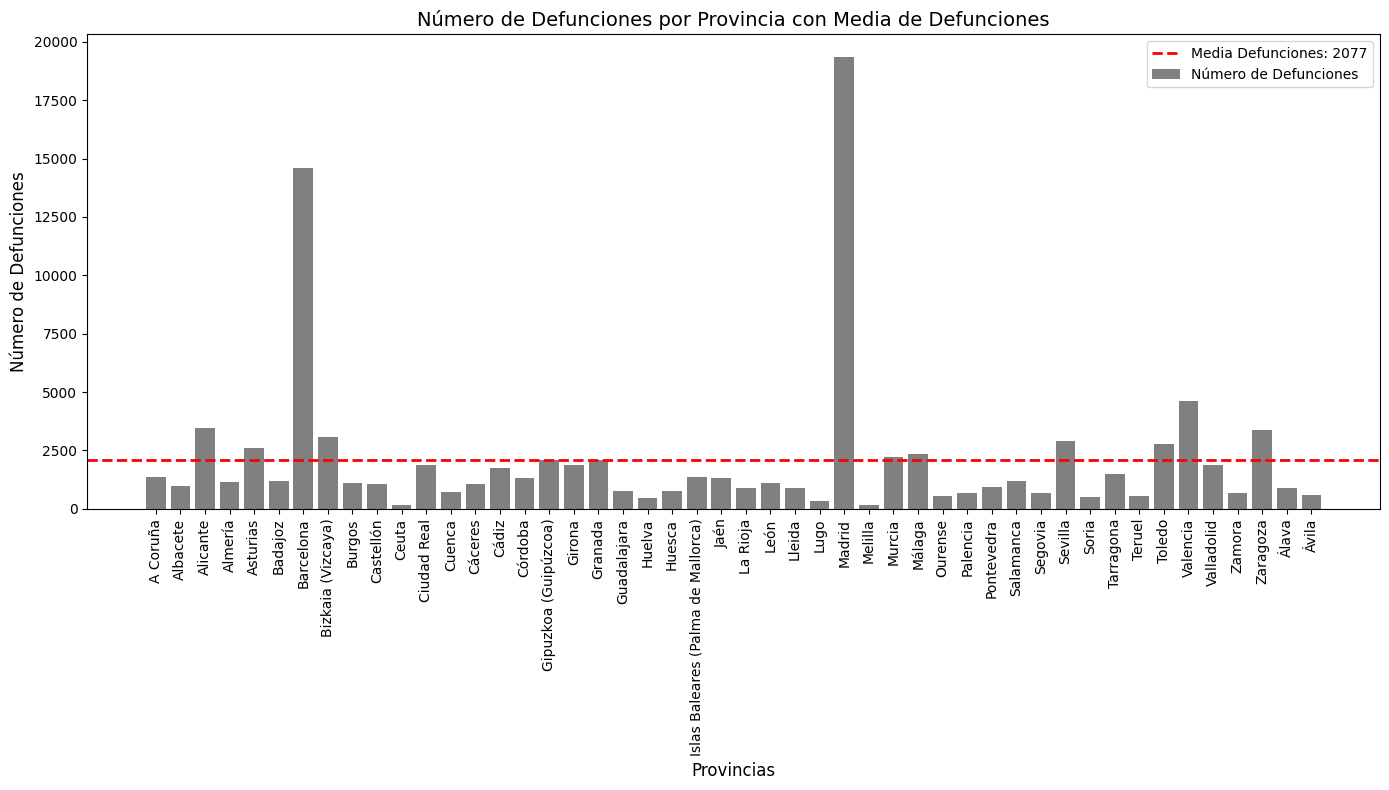

In [34]:
# Crear un gráfico de barras para el número de defunciones con una línea horizontal para la media
fig, ax = plt.subplots(figsize=(14, 8))

# Configuración de posiciones
x = range(len(df["provincia_nombre"]))

# Dibujar las barras para el número de defunciones
ax.bar(x, df["num_def"], color="grey", label="Número de Defunciones")

# Añadir la línea horizontal para la media de defunciones
ax.axhline(media_defunciones, color='red', linestyle='--', linewidth=2, label=f"Media Defunciones: {media_defunciones:.0f}")

# Configurar el gráfico
ax.set_xlabel("Provincias", fontsize=12)
ax.set_ylabel("Número de Defunciones", fontsize=12)
ax.set_title("Número de Defunciones por Provincia con Media de Defunciones", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["provincia_nombre"], rotation=90, ha="center")
ax.legend()

# Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()


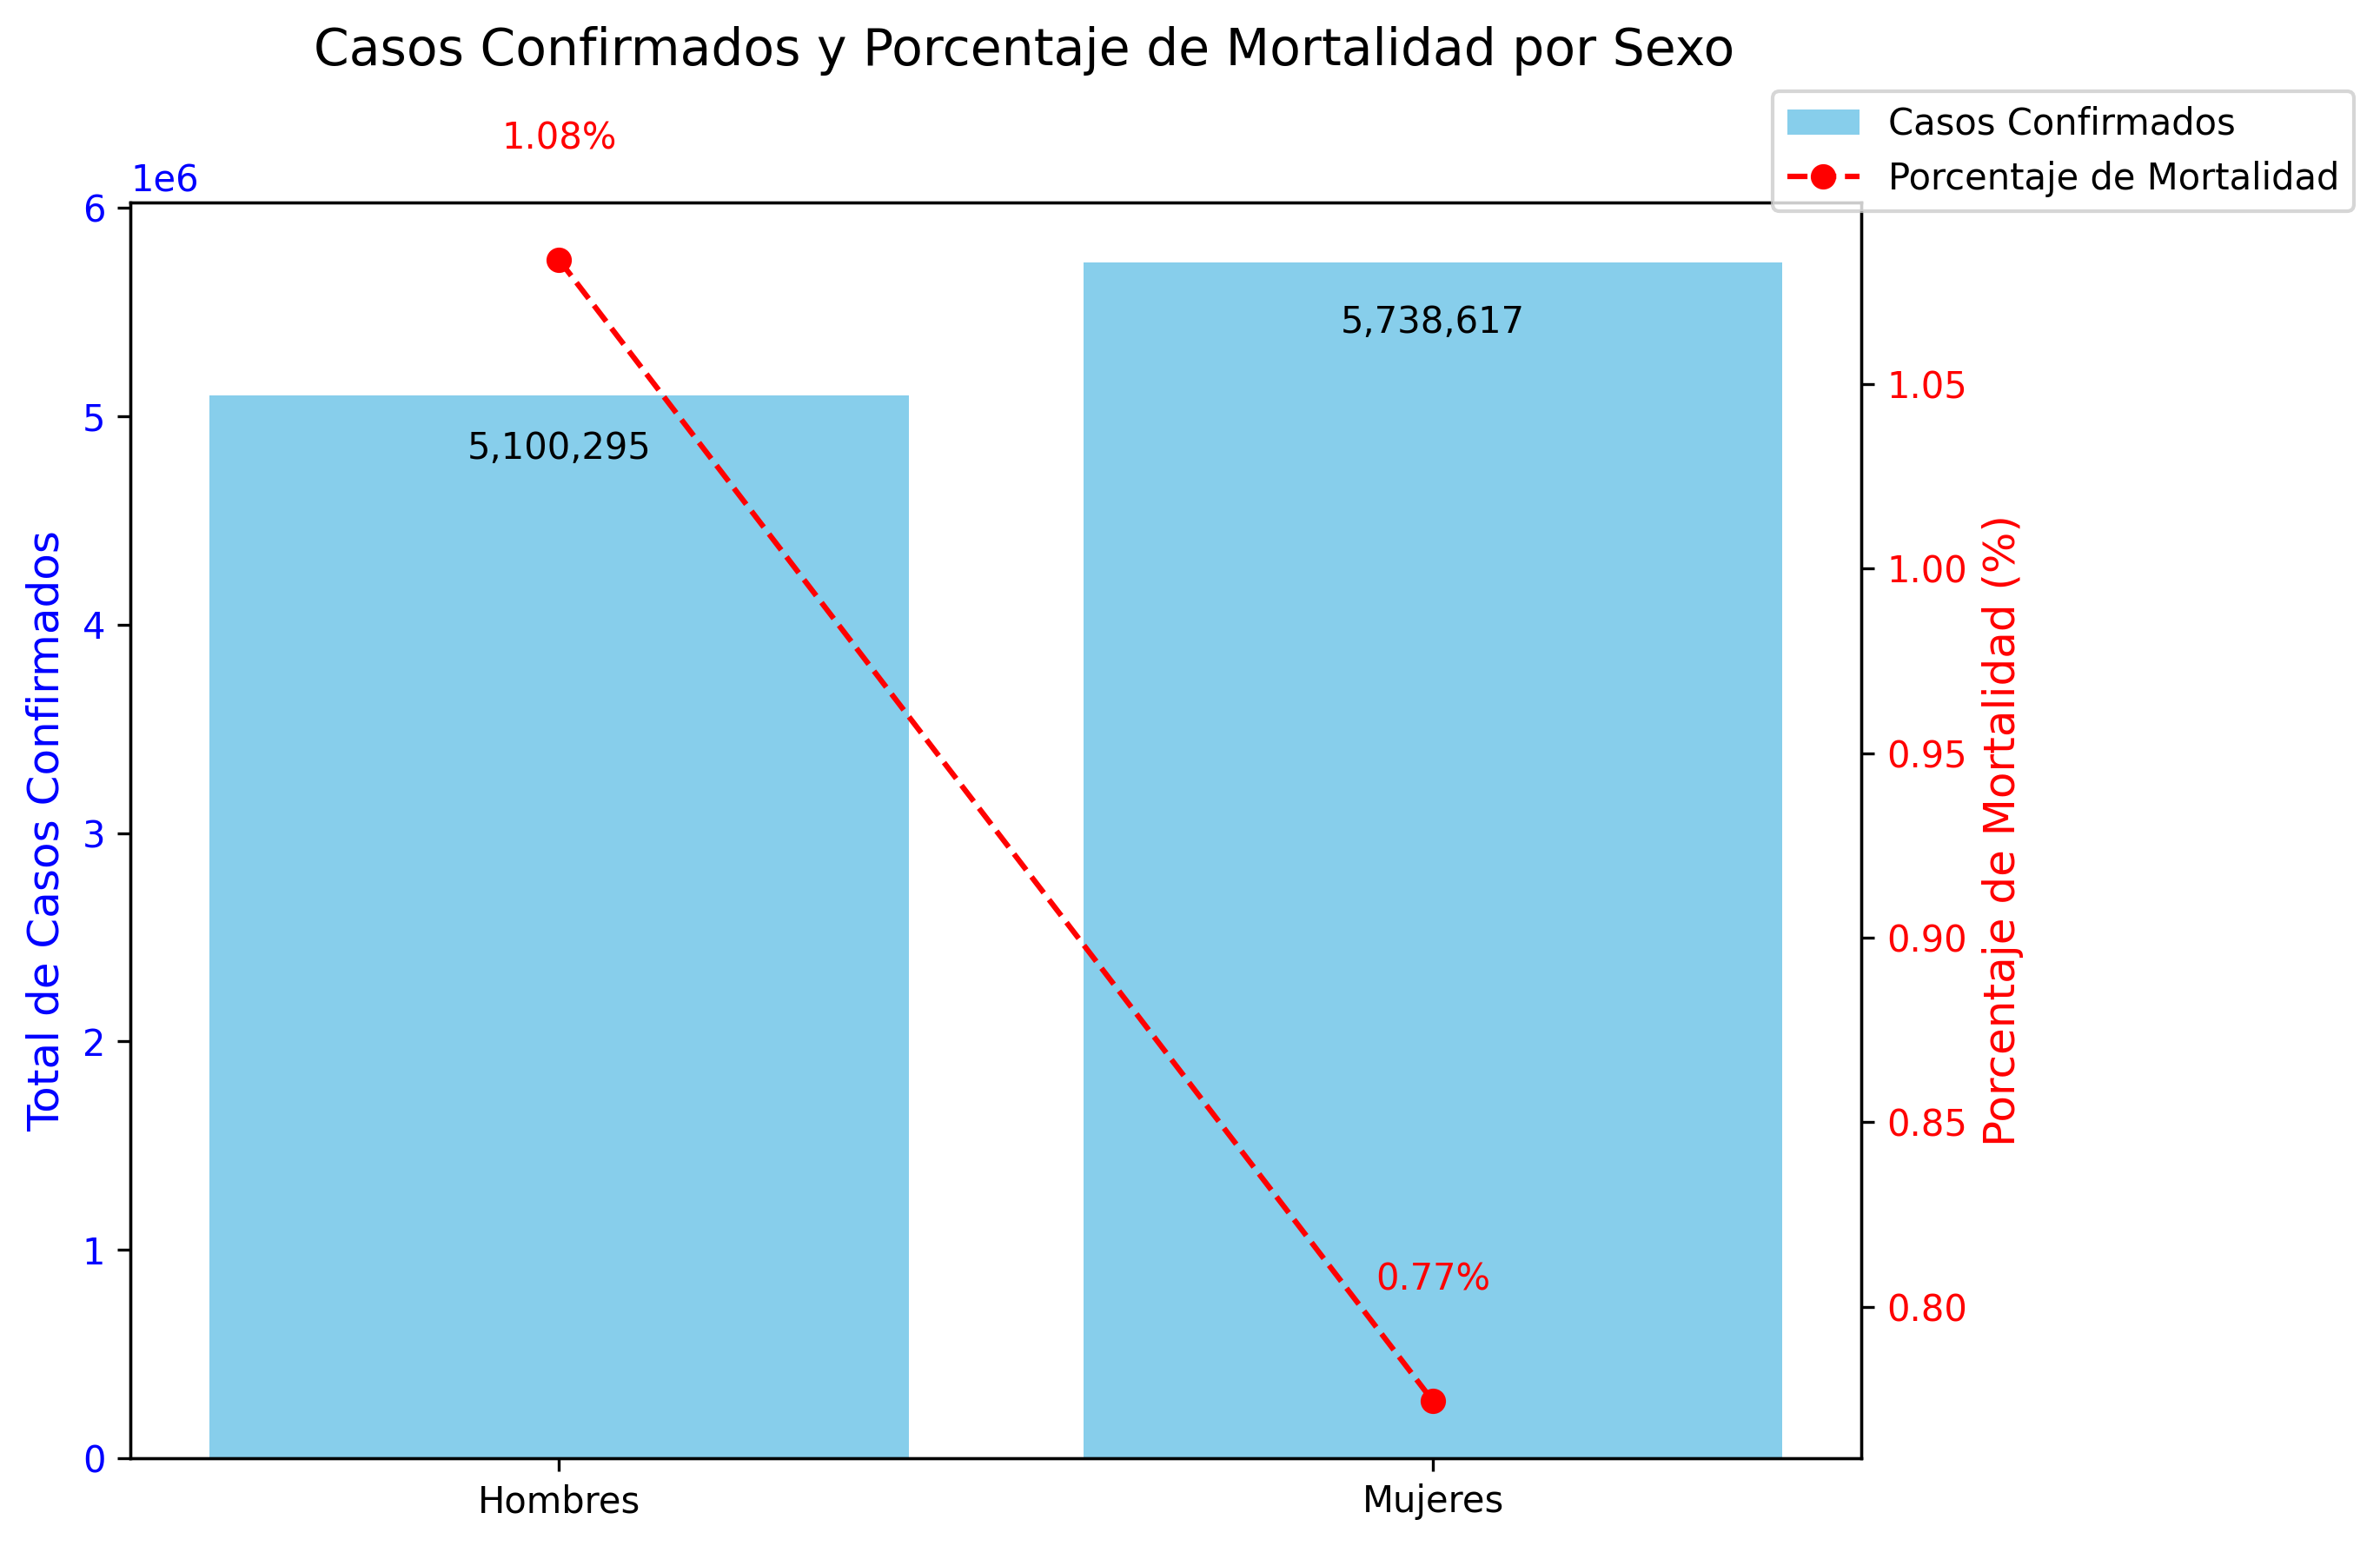

In [38]:
from IPython.display import Image
Image(filename="grafico.png")